# 查看数据集

In [12]:
from PIL import Image
import glob
img_path = '/root/autodl-tmp/SP/images'
map_path = '/root/autodl-tmp/SP/maps'

train_img_files = glob.glob(img_path+'/train/*.*')
train_map_files = glob.glob(map_path+'/train/*.*')
img = Image.open(train_img_files[0])
map = Image.open(train_map_files[0])

# 图片相关信息

In [13]:
# 显示格式
print(img.format)
print(img.size)
print(img.mode)
print(map.format)
print(map.size)
print(map.mode)

JPEG
(640, 480)
RGB
PNG
(640, 480)
L


In [14]:
import torchvision.transforms as transforms
a = transforms.functional.to_tensor(img)
b = transforms.functional.to_tensor(map)

In [15]:
print(a.shape)
print(b.shape)

torch.Size([3, 480, 640])
torch.Size([1, 480, 640])


In [16]:
print(a[0,0,0])
print(b[0,0,0])

tensor(0.1569)
tensor(0.)


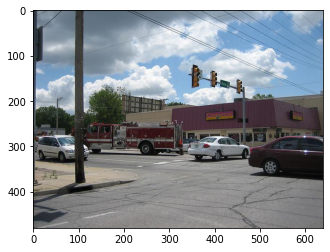

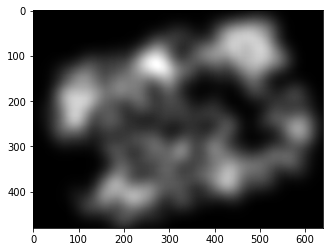

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.figure()
plt.imshow(map,cmap='gray')

## 绘图函数

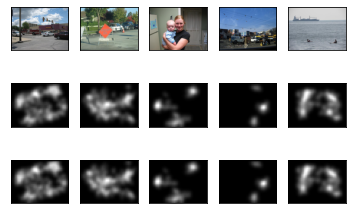

In [20]:
import numpy as np
n=5

img_transforms = transforms.Compose([
    transforms.Resize(size=(240,320)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])# according to the pytorch docs
])

map_transforms = transforms.Compose([
    transforms.Resize(size=(30,40)),
    transforms.ToTensor(),
])

imgs = [img_transforms(Image.open(train_img_files[i])) for i in range(n)]
maps = [map_transforms(Image.open(train_map_files[i])) for i in range(n)]

def show_img(imgs,maps,outputs):
    def inverse_normalize(tensor, mean, std):# 避免normalize之后显示出来的图像很奇怪
        for t, m, s in zip(tensor, mean, std):
            t.mul_(s).add_(m)
        return tensor
    n = len(imgs)
    fig,axes = plt.subplots(3,n)
    for i in range(0,n):
        axes[0,i].imshow(np.asarray(transforms.functional.to_pil_image(inverse_normalize(imgs[i],mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]).detach())))
        axes[0,i].set_xticks([]);axes[0,i].set_yticks([])
        axes[1,i].imshow(transforms.functional.to_pil_image(maps[i]),cmap='gray')
        axes[1,i].set_xticks([]);axes[1,i].set_yticks([])
        axes[2,i].imshow(transforms.functional.to_pil_image(outputs[i]),cmap='gray')
        axes[2,i].set_xticks([]);axes[2,i].set_yticks([])
    # return fig
show_img(imgs,maps,maps)

In [19]:
print(len(imgs))
print(imgs[0].shape)
print(type(imgs[0]))

5
torch.Size([3, 240, 320])
<class 'torch.Tensor'>
